In [1]:
import nltk 
from bs4 import BeautifulSoup
import requests
import matplotlib.pyplot as plt
from scipy.misc import imread
from os import path
from wordcloud import WordCloud, STOPWORDS, ImageColorGenerator
from nltk.corpus import stopwords
import re
%matplotlib inline

In [2]:
#TRUMP CANDIDACY ANNOUNCEMENT

url = "https://www.washingtonpost.com/news/post-politics/wp/2015/06/16/full-text-donald-trump-announces-a-presidential-bid/"

# Get the URL, do not check the SSL certificate
resp = requests.get(url)

# Get the text
content = resp.text

start_phrase = "Wow. Whoa."
end_phrase = "Thank you very much."
s = content.index(start_phrase)
e = content.index(end_phrase)
true_content = content[s+len(start_phrase):e]


In [3]:
tokens = true_content.split()

# The nltk.Text object will offer us many useful functions for text analysis
text = nltk.Text(tokens)

# Frequency analysis for words of interest
fdist = text.vocab()


In [4]:
mystops = []
mystops.append('one')
mystops.append('may')
mystops.append('would')
mystops.append('need')

def remove_stopwords(text, hapaxes):
    stopwords = nltk.corpus.stopwords.words('english')
    content = [w.lower() for w in text 
               if w.lower() not in stopwords  
                   and w.lower() not in mystops # w should not be in custom stop word list
                   and w.isalpha()
                   and w.lower() not in hapaxes] # w should have frequency > 1 
    return nltk.Text(content)

text_nostopwords = remove_stopwords(text, fdist.hapaxes())
fdist_nostopwords = text_nostopwords.vocab()

In [9]:
trump = " ".join(text_nostopwords)

In [10]:
finaltrump = trump.replace("TRUMP", "")\
                  .replace("people", "")\
                  .replace("APPLAUSE", "")\
                  .replace("AUDIENCE", "")\
                  .replace("going ", "")

In [11]:
file = open("trump.txt", "w")
file.write(finaltrump)
file.close()

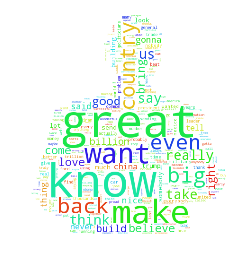

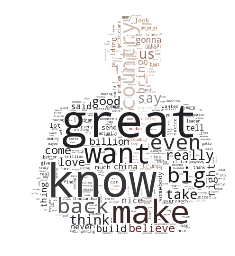

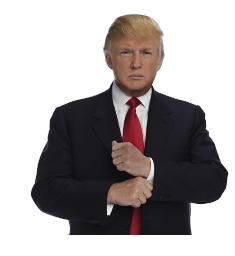

In [18]:
d = path.dirname('__file__')

text = open(path.join(d, 'trump.txt')).read()
trump_mask = imread(path.join(d, "trump.png"))
image_colors = ImageColorGenerator(trump_mask)

wc = WordCloud(background_color="white", 
               max_words=2000, 
               mask=trump_mask,
               stopwords=STOPWORDS.add("got"))

wc.generate(text)

plt.imshow(wc)
plt.axis("off")
plt.figure()

plt.imshow(wc.recolor(color_func=image_colors))
plt.axis("off")
plt.figure()

plt.imshow(trump_mask, cmap=plt.cm.gray)
plt.axis("off")
plt.show()